In [21]:
%pylab
%matplotlib inline
from tensorflow import keras
import torch
from torch import nn
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
def plot_img(img,label):
    plt.imshow(img)
    plt.title("Output :-"+str(label))

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


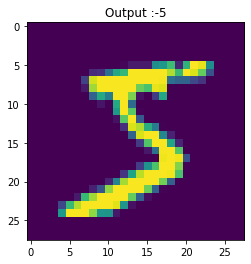

In [22]:
plot_img(X_train[0],y_train[0])

In [26]:
epochs=5
model=nn.Sequential(nn.Linear(784,10),nn.Sigmoid())
Loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.001)
batch_size=64
n=len(X_train)
X=torch.from_numpy(X_train).view(-1,784)/255.
Y=torch.from_numpy(y_train).view(-1)
X=X.type(torch.float)
Y=Y.type(torch.LongTensor)
total_batchs=n//batch_size
for i in range(epochs):
    loss_val=torch.Tensor([0.])
    model.train()
    for batch in range(total_batchs):
        optim.zero_grad()
        pred=model(X[batch*batch_size:(batch+1)*batch_size])
        loss=Loss(pred,Y[batch*batch_size:(batch+1)*batch_size])
        loss.backward()
        optim.step()
        loss_val+=loss
    if True:
        print("Epochs {},Loss {}".format(i+1,loss_val.data/n))
        model.eval()
        pred=model(torch.from_numpy(X_test.reshape(X_test.shape[0],-1)/255.).type(torch.float)).detach().numpy()
        print("Test accuracy :",np.mean(np.argmax(pred,axis=1).reshape(y_test.shape)==y_test))

Epochs 1,Loss tensor([0.0351])
Test accuracy : 0.8304
Epochs 2,Loss tensor([0.0343])
Test accuracy : 0.8292
Epochs 3,Loss tensor([0.0337])
Test accuracy : 0.8267
Epochs 4,Loss tensor([0.0333])
Test accuracy : 0.8243
Epochs 5,Loss tensor([0.0329])
Test accuracy : 0.8226


In [27]:
res=[]
for weight in model.parameters():
    res.append(weight.data.numpy())
weights=res[0]

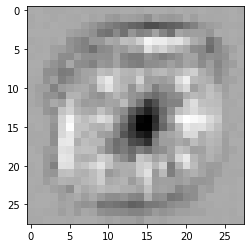

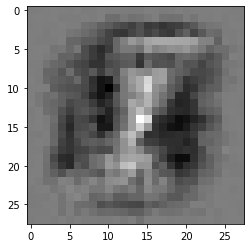

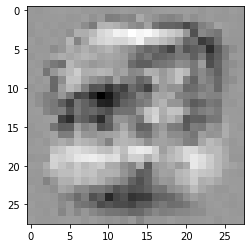

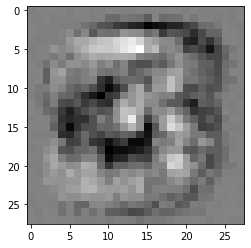

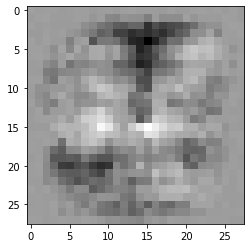

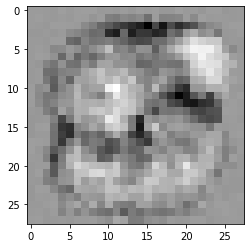

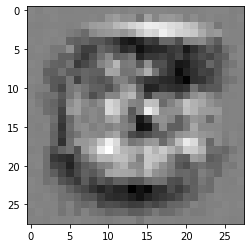

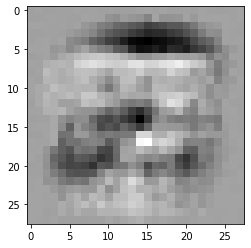

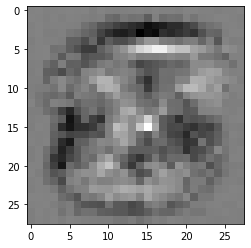

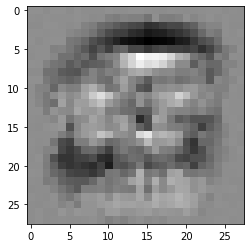

In [28]:
for i in range(10):
    plt.imshow(weights[i].reshape(28,28),cmap="gray")
    plt.show()

We can see that how the weight are correlated input towards output like Weights is like plane of sand and each training sampele make its mark on sand.It will fit the mark which is similar kind 